In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
train_path = '../datasets/flags/flags-train.arff'
test_path = '../datasets/flags/flags-test.arff'
num_features = 19
train_data = arff.load(open(train_path, 'rt'))
train_data = np.array(train_data['data']).astype(np.float32)
test_data = arff.load(open(test_path, 'rt'))
test_data = np.array(test_data['data']).astype(np.float32)
a = train_data[:, :num_features].max(axis=0)
b = train_data[:, :num_features].min(axis=0)

train_spikes, train_labels = encode_data_to_spikes(train_data, device, num_features, a, b)
test_spikes, test_labels = encode_data_to_spikes(test_data, device, num_features, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", train_labels.shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", test_labels.shape)

100%|██████████| 65/65 [00:00<00:00, 8105.30it/s]

Train data shape:  (129, 1, 114)
Train labels shape:  (129, 7)
Test data shape:  (65, 1, 114)
Test labels shape:  (65, 7)


## CIFDM Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (43, 1, 114)
Train Labels shape is  (43, 3)
Classes trained are: 0 to 3


  0%|          | 1/4000 [00:00<12:28,  5.34it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 2
Class 1, class 1 neurons = 3, class 0 neurons = 4
Class 2, class 1 neurons = 4, class 0 neurons = 2


100%|██████████| 4000/4000 [36:56<00:00,  1.80it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 3) (65, 3)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.353846  |
| zero_one_loss       | 0.676923  |
| one_error           | 0.0923077 |
| micro av. jaccard   | 0.543046  |
| macro av. jaccard   | 0.494615  |
| micro av. precision | 0.66129   |
| macro av. precision | 0.671495  |
| micro av. recall    | 0.752294  |
| macro av. recall    | 0.720539  |
| micro av. f1        | 0.703863  |
| macro av. f1        | 0.636099  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 3) (65, 3)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.353846  |
| zero_one_loss       | 0.676923  |
| one_error           | 0.0923077 |
| micro av. jaccard   | 0.543046  |
| macro av. jaccard   | 0.494615  |
| micro av. precision | 0.66129   |
| macro av. precis

  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 2
Class 1, class 1 neurons = 3, class 0 neurons = 4
Class 2, class 1 neurons = 4, class 0 neurons = 3
Class 3, class 1 neurons = 3, class 0 neurons = 1
Class 4, class 1 neurons = 2, class 0 neurons = 1


100%|██████████| 4000/4000 [54:49<00:00,  1.22it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 2) (65, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.323077 |
| zero_one_loss       | 0.446154 |
| one_error           | 0.2      |
| micro av. jaccard   | 0.557895 |
| macro av. jaccard   | 0.425641 |
| micro av. precision | 0.791045 |
| macro av. precision | 0.892308 |
| micro av. recall    | 0.654321 |
| macro av. recall    | 0.533333 |
| micro av. f1        | 0.716216 |
| macro av. f1        | 0.502155 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 5) (65, 5)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.316923 |
| zero_one_loss       | 0.8      |
| one_error           | 0        |
| micro av. jaccard   | 0.567227 |
| macro av. jaccard   | 0.480622 |
| micro av. precision | 0.737705 |
| macro av. precision | 0.823971 |
| mi

  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 2
Class 1, class 1 neurons = 5, class 0 neurons = 5
Class 2, class 1 neurons = 5, class 0 neurons = 3
Class 3, class 1 neurons = 4, class 0 neurons = 2
Class 4, class 1 neurons = 3, class 0 neurons = 1
Class 5, class 1 neurons = 3, class 0 neurons = 2
Class 6, class 1 neurons = 3, class 0 neurons = 3


100%|██████████| 4000/4000 [1:21:30<00:00,  1.22s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 2) (65, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.261538  |
| zero_one_loss       | 0.476923  |
| one_error           | 0.0461538 |
| micro av. jaccard   | 0.128205  |
| macro av. jaccard   | 0.0961538 |
| micro av. precision | 0.294118  |
| macro av. precision | 0.25      |
| micro av. recall    | 0.185185  |
| macro av. recall    | 0.119048  |
| micro av. f1        | 0.227273  |
| macro av. f1        | 0.16129   |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 7) (65, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.312088 |
| zero_one_loss       | 0.892308 |
| one_error           | 0        |
| micro av. jaccard   | 0.483636 |
| macro av. jaccard   | 0.349675 |
| micro av. precision | 0.696335 |
| macro av. precision | 0.

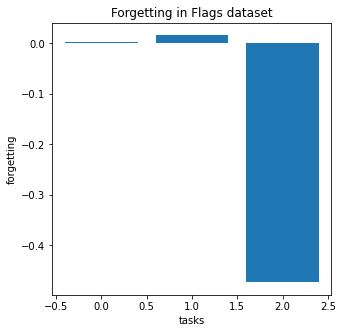

In [3]:
hparams_dict = {
    'inputs': 114,
    'outputs': 7,
    'time_constant': 300,
    'alpha_a': 0.52,
    'alpha_m': 0.22,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-4,
    'sim_time': 600,
    'n_epochs': 4000,
    'print_every': 400,
    'name': 'Flags',
    'tasks': {'samples': [43, 43, 43], 'labels': [3, 2, 2]},
    'seed': 2,
    'ckpt_dir': './checkpoints/flags',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (43, 1, 114)
Train Labels shape is  (43, 3)
Classes trained are: 0 to 3


  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 2
Class 1, class 1 neurons = 2, class 0 neurons = 5
Class 2, class 1 neurons = 2, class 0 neurons = 5


100%|██████████| 4000/4000 [37:47<00:00,  1.76it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 3) (65, 3)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.184615  |
| zero_one_loss       | 0.476923  |
| one_error           | 0.0153846 |
| micro av. jaccard   | 0.595506  |
| macro av. jaccard   | 0.338053  |
| micro av. precision | 0.828125  |
| macro av. precision | 0.55364   |
| micro av. recall    | 0.679487  |
| macro av. recall    | 0.393091  |
| micro av. f1        | 0.746479  |
| macro av. f1        | 0.417035  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 3) (65, 3)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.184615  |
| zero_one_loss       | 0.476923  |
| one_error           | 0.0153846 |
| micro av. jaccard   | 0.595506  |
| macro av. jaccard   | 0.338053  |
| micro av. precision | 0.828125  |
| macro av. precis

  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 6, class 0 neurons = 2
Class 1, class 1 neurons = 2, class 0 neurons = 5
Class 2, class 1 neurons = 2, class 0 neurons = 5
Class 3, class 1 neurons = 3, class 0 neurons = 1
Class 4, class 1 neurons = 2, class 0 neurons = 3


100%|██████████| 4000/4000 [57:22<00:00,  1.16it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 2) (65, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.4      |
| zero_one_loss       | 0.630769 |
| one_error           | 0.169231 |
| micro av. jaccard   | 0.103448 |
| macro av. jaccard   | 0.104762 |
| micro av. precision | 0.857143 |
| macro av. precision | 0.9      |
| micro av. recall    | 0.105263 |
| macro av. recall    | 0.107407 |
| micro av. f1        | 0.1875   |
| macro av. f1        | 0.1875   |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 5) (65, 5)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.286154 |
| zero_one_loss       | 0.8      |
| one_error           | 0        |
| micro av. jaccard   | 0.358621 |
| macro av. jaccard   | 0.220641 |
| micro av. precision | 0.83871  |
| macro av. precision | 0.688    |
| mi

  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 9, class 0 neurons = 2
Class 1, class 1 neurons = 2, class 0 neurons = 5
Class 2, class 1 neurons = 2, class 0 neurons = 5
Class 3, class 1 neurons = 4, class 0 neurons = 2
Class 4, class 1 neurons = 2, class 0 neurons = 4
Class 5, class 1 neurons = 3, class 0 neurons = 2
Class 6, class 1 neurons = 4, class 0 neurons = 2


100%|██████████| 4000/4000 [1:23:28<00:00,  1.25s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 2) (65, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.346154 |
| zero_one_loss       | 0.538462 |
| one_error           | 0.153846 |
| micro av. jaccard   | 0.567308 |
| macro av. jaccard   | 0.505128 |
| micro av. precision | 0.728395 |
| macro av. precision | 0.689423 |
| micro av. recall    | 0.719512 |
| macro av. recall    | 0.651515 |
| micro av. f1        | 0.723926 |
| macro av. f1        | 0.633906 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 7) (65, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.320879 |
| zero_one_loss       | 0.907692 |
| one_error           | 0        |
| micro av. jaccard   | 0.408907 |
| macro av. jaccard   | 0.283623 |
| micro av. precision | 0.770992 |
| macro av. precision | 0.680538 |
| mi

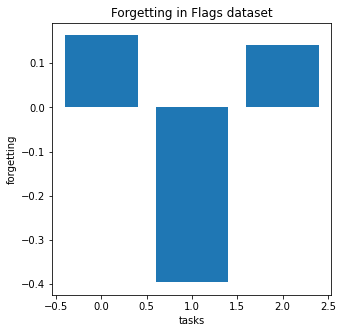

In [4]:
hparams_dict = {
    'inputs': 114,
    'outputs': 7,
    'time_constant': 300,
    'alpha_a': 0.52,
    'alpha_m': 0.22,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-4,
    'sim_time': 600,
    'n_epochs': 4000,
    'print_every': 400,
    'name': 'Flags',
    'tasks': {'samples': [43, 43, 43], 'labels': [3, 2, 2]},
    'seed': 3,
    'ckpt_dir': './checkpoints/flags',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)

Training and Evaluating on task 1
Train data shape is  (43, 1, 114)
Train Labels shape is  (43, 3)
Classes trained are: 0 to 3


  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 5, class 0 neurons = 2
Class 1, class 1 neurons = 2, class 0 neurons = 5
Class 2, class 1 neurons = 4, class 0 neurons = 4


100%|██████████| 4000/4000 [38:50<00:00,  1.72it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 3) (65, 3)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.189744 |
| zero_one_loss       | 0.415385 |
| one_error           | 0        |
| micro av. jaccard   | 0.633663 |
| macro av. jaccard   | 0.419158 |
| micro av. precision | 0.820513 |
| macro av. precision | 0.542529 |
| micro av. recall    | 0.735632 |
| macro av. recall    | 0.491503 |
| micro av. f1        | 0.775758 |
| macro av. f1        | 0.506911 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 3) (65, 3)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.189744 |
| zero_one_loss       | 0.415385 |
| one_error           | 0        |
| micro av. jaccard   | 0.633663 |
| macro av. jaccard   | 0.419158 |
| micro av. precision | 0.820513 |
| macro av. precision | 0.542529 |
| mi

  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 6, class 0 neurons = 2
Class 1, class 1 neurons = 2, class 0 neurons = 5
Class 2, class 1 neurons = 4, class 0 neurons = 4
Class 3, class 1 neurons = 3, class 0 neurons = 2
Class 4, class 1 neurons = 2, class 0 neurons = 3


100%|██████████| 4000/4000 [59:34<00:00,  1.12it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 2) (65, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.346154  |
| zero_one_loss       | 0.615385  |
| one_error           | 0.0769231 |
| micro av. jaccard   | 0.5       |
| macro av. jaccard   | 0.402074  |
| micro av. precision | 0.762712  |
| macro av. precision | 0.77963   |
| micro av. recall    | 0.592105  |
| macro av. recall    | 0.492441  |
| micro av. f1        | 0.666667  |
| macro av. f1        | 0.523058  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 5) (65, 5)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.276923 |
| zero_one_loss       | 0.815385 |
| one_error           | 0        |
| micro av. jaccard   | 0.52381  |
| macro av. jaccard   | 0.373791 |
| micro av. precision | 0.792    |
| macro av. precision | 0.

  0%|          | 0/4000 [00:00<?, ?it/s]

Class 0, class 1 neurons = 9, class 0 neurons = 2
Class 1, class 1 neurons = 2, class 0 neurons = 5
Class 2, class 1 neurons = 5, class 0 neurons = 5
Class 3, class 1 neurons = 4, class 0 neurons = 2
Class 4, class 1 neurons = 2, class 0 neurons = 4
Class 5, class 1 neurons = 3, class 0 neurons = 2
Class 6, class 1 neurons = 4, class 0 neurons = 2


100%|██████████| 4000/4000 [1:26:29<00:00,  1.30s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 2) (65, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.384615 |
| zero_one_loss       | 0.646154 |
| one_error           | 0.123077 |
| micro av. jaccard   | 0.230769 |
| macro av. jaccard   | 0.224359 |
| micro av. precision | 0.576923 |
| macro av. precision | 0.5625   |
| micro av. recall    | 0.277778 |
| macro av. recall    | 0.270563 |
| micro av. f1        | 0.375    |
| macro av. f1        | 0.365372 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
float32 int64
(65, 7) (65, 7)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.318681 |
| zero_one_loss       | 0.907692 |
| one_error           | 0        |
| micro av. jaccard   | 0.422311 |
| macro av. jaccard   | 0.324786 |
| micro av. precision | 0.757143 |
| macro av. precision | 0.625107 |
| mi

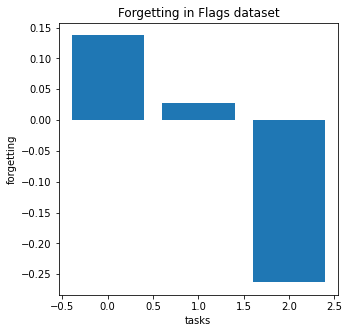

In [5]:
hparams_dict = {
    'inputs': 114,
    'outputs': 7,
    'time_constant': 300,
    'alpha_a': 0.52,
    'alpha_m': 0.22,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 1e-4,
    'sim_time': 600,
    'n_epochs': 4000,
    'print_every': 400,
    'name': 'Flags',
    'tasks': {'samples': [43, 43, 43], 'labels': [3, 2, 2]},
    'seed': 4,
    'ckpt_dir': './checkpoints/flags',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)